<h1 align="center"> Artificial Neural Network </h1>
<h1 align="center"> Date:11/06/2019 </h1>

# 1. Data

- We use the full Toyota Corolla dataset to show how to use artificial neural network models for prediction. 
- Compared to the simplified version, the full dataset contains many columns.

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

## 1.1 Import data

In [2]:
# dat=pd.read_excel(r"C:/Users/yy63t/Desktop/PE6001/
#                  11.01-Introduction to python/
#                  ToyotaCorolla_FullData.xls",sheet_name="data")
# put jupyter notebook and dataset in the same folder
dat=pd.read_excel("ToyotaCorolla_FullData.xls",sheet_name="data")

# for the covenience of table show, we transpose the tabel
dat.head().transpose()

,0,1,2,3,4
Id,1,2,3,4,5
Model,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors
Price,13500,13750,13950,14950,13750
Age_08_04,23,23,24,26,30
Mfg_Month,10,10,9,7,3
Mfg_Year,2002,2002,2002,2002,2002
KM,46986,72937,41711,48000,38500
Fuel_Type,Diesel,Diesel,Diesel,Diesel,Diesel
HP,90,90,90,90,90
Met_Color,1,1,1,0,0


In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
Id                   1436 non-null int64
Model                1436 non-null object
Price                1436 non-null int64
Age_08_04            1436 non-null int64
Mfg_Month            1436 non-null int64
Mfg_Year             1436 non-null int64
KM                   1436 non-null int64
Fuel_Type            1436 non-null object
HP                   1436 non-null int64
Met_Color            1436 non-null int64
Color                1436 non-null object
Automatic            1436 non-null int64
CC                   1436 non-null int64
Doors                1436 non-null int64
Cylinders            1436 non-null int64
Gears                1436 non-null int64
Quarterly_Tax        1436 non-null int64
Weight               1436 non-null int64
Mfr_Guarantee        1436 non-null int64
BOVAG_Guarantee      1436 non-null int64
Guarantee_Period     1436 non-null int64
ABS                  1436 non

We can see that 'Fuel_Type' and 'Color' are categorical variables. We will deal with them in next section.

In [4]:
'''
many algorithms cannot deal with null values, 
you need to check NaN before using algorithms.
'''
dat.isnull().sum()

Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

In [5]:
# get the descriptive summary
dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1436.0,721.555014,416.476890,1.0,361.75,721.5,1081.25,1442.0
Price,1436.0,10730.824513,3626.964585,4350.0,8450.00,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.00,61.0,70.00,80.0
Mfg_Month,1436.0,5.548747,3.354085,1.0,3.00,5.0,8.00,12.0
Mfg_Year,1436.0,1999.625348,1.540722,1998.0,1998.00,1999.0,2001.00,2004.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.00,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.00,110.0,110.00,192.0
Met_Color,1436.0,0.674791,0.468616,0.0,0.00,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.00,0.0,0.00,1.0
CC,1436.0,1576.855850,424.386770,1300.0,1400.00,1600.0,1600.00,16000.0


## 1.2 Data transformation

The categorical/string columns cannot be directly used as input for most algorithms. Let's create dummies for them.

In [6]:
Fuel_Type=pd.get_dummies(dat['Fuel_Type'])
Fuel_Type.head(5)

,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [7]:
# add prefix
Fuel_Type=pd.get_dummies(dat['Fuel_Type'],prefix='Fuel_Type')
Fuel_Type.head(5)

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [8]:
Color=pd.get_dummies(dat['Color'],prefix='Color')
Color.head(5)

,Color_Beige,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [9]:
# Concat all dummies and continuous variables to create predictors X
# drop Id and Model
dat2=pd.concat([Fuel_Type,Color,
                dat.drop(['Id','Model','Fuel_Type','Color'],axis=1)
               ],
               axis=1)
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 48 columns):
Fuel_Type_CNG        1436 non-null uint8
Fuel_Type_Diesel     1436 non-null uint8
Fuel_Type_Petrol     1436 non-null uint8
Color_Beige          1436 non-null uint8
Color_Black          1436 non-null uint8
Color_Blue           1436 non-null uint8
Color_Green          1436 non-null uint8
Color_Grey           1436 non-null uint8
Color_Red            1436 non-null uint8
Color_Silver         1436 non-null uint8
Color_Violet         1436 non-null uint8
Color_White          1436 non-null uint8
Color_Yellow         1436 non-null uint8
Price                1436 non-null int64
Age_08_04            1436 non-null int64
Mfg_Month            1436 non-null int64
Mfg_Year             1436 non-null int64
KM                   1436 non-null int64
HP                   1436 non-null int64
Met_Color            1436 non-null int64
Automatic            1436 non-null int64
CC                   1436 non-nu

## 1.3 Create predictors(X) and response(y)

In [10]:
# create X and y
X1=dat2.drop(['Price'],axis=1)
y1=dat2['Price'].copy()

In [11]:
X1.shape

(1436, 47)

In [12]:
y1.shape

(1436,)

## 1.4 Data scaling

In [13]:
# it is usually recommended to scale data before apply ANN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2=scaler.fit_transform(X1)
y2=scaler.fit_transform(y1.values.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
X2

array([[-0.10945441,  2.87480715, -2.71087388, ..., -0.41271558,
        -0.05285164, -0.62029327],
       [-0.10945441,  2.87480715, -2.71087388, ..., -0.41271558,
        -0.05285164, -0.62029327],
       [-0.10945441,  2.87480715, -2.71087388, ..., -0.41271558,
        -0.05285164, -0.62029327],
       ...,
       [-0.10945441, -0.34784942,  0.36888474, ..., -0.41271558,
        -0.05285164, -0.62029327],
       [-0.10945441, -0.34784942,  0.36888474, ..., -0.41271558,
        -0.05285164, -0.62029327],
       [-0.10945441, -0.34784942,  0.36888474, ..., -0.41271558,
        -0.05285164, -0.62029327]])

In [15]:
y2

array([[ 0.76376268],
       [ 0.83271485],
       [ 0.88787659],
       ...,
       [-0.6152808 ],
       [-0.96004167],
       [-1.04278428]])

## 1.4 Data partition

In [16]:
'''
30-70% simple split, training dataset contains 70% data, testing dataset contains 30% data.
train data is used to train a model, and test data is used to test model performance.
To make results reproducible, set the random_state.
'''
from sklearn import model_selection
train_y,test_y,train_X,test_X=model_selection.train_test_split(y2,X2,test_size=0.3,random_state=123)

# 2. Predictive modeling

## 2.1 Train an ANN model

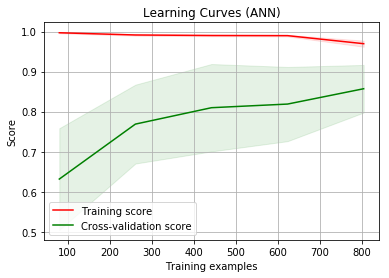

In [17]:
# define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, color="g", label="Cross-validation score")   
    plt.legend(loc="best")
    return plt

X= train_X
y = train_y

title = "Learning Curves (ANN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MLPRegressor(alpha=1e-3)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

We can see that there is gap between training score and validation score, we have overfitting problem in our model. This is probably because datasize is not large enough. If we have large enough data, the gap will become smaller. Also we can tune hypermeters to solve overfitting problem.

In [18]:
estimator.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Text(0.5, 0, 'Iteration')

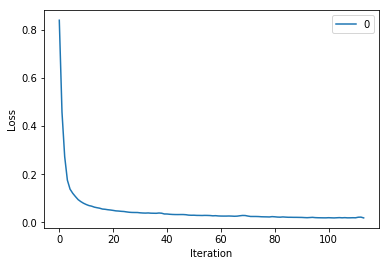

In [19]:
# plot loss curve
pd.DataFrame(estimator.loss_curve_).plot()
plt.ylabel('Loss')
plt.xlabel('Iteration')
# plt.xlim([0, 200])

## 2.2 Evaluate model performance

In [20]:
# predict on test data
pred_y1=estimator.predict(test_X)
pd.Series(pred_y1).describe()

count    431.000000
mean       0.093035
std        1.012216
min       -2.203611
25%       -0.539717
50%       -0.183861
75%        0.397061
max        5.814998
dtype: float64

We notice that the predicted price is in the normalized scale. We need to covert it back to the original scale.

In [21]:
pred_y1_raw=scaler.inverse_transform(pred_y1.reshape(-1,1))
pred_y1_raw=pd.Series(pred_y1_raw.reshape(pred_y1.shape[0]))
pred_y1_raw.describe()

count      431.000000
mean     11068.140860
std       3669.991734
min       2741.189899
25%       8773.972670
50%      10064.200328
75%      12170.450645
max      31814.270561
dtype: float64

In [22]:
# convert test_y back to the original scale
test_y_raw=scaler.inverse_transform(test_y.reshape(-1,1))
test_y_raw=pd.Series(test_y_raw.reshape(test_y.shape[0]))
test_y_raw.describe()

count      431.000000
mean     10848.401392
std       3724.719780
min       5740.000000
25%       8450.000000
50%       9900.000000
75%      11970.000000
max      31000.000000
dtype: float64

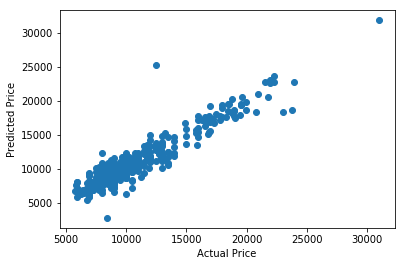

In [23]:
# compare predicted price with actual price
plt.scatter(test_y_raw,pred_y1_raw)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Calculate some performance metrics.

In [24]:
from sklearn import metrics

# calculate Mean Absolute Error(MAE)
metrics.mean_absolute_error(test_y_raw,pred_y1_raw)

947.200410152776

In [25]:
# calculate Mean Squared Error(MSE)
metrics.mean_squared_error(test_y_raw,pred_y1_raw)

1851976.765561589

In [26]:
# calculate R squared
metrics.r2_score(test_y_raw, pred_y1_raw)

0.8661996843855825

## 2.3 Tune hypermeters to mitigate overfitting problem

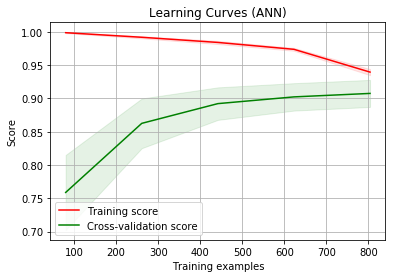

In [33]:
# tune hypermeters to avoid overfitting problem
estimator2 = MLPRegressor(alpha=0.5)
plot_learning_curve(estimator2, title, X, y, cv=cv, n_jobs=4)
plt.show()

We can see that the gap between training and validation is decreased. Thus, the overfitting problem is mitigated.

In [39]:
estimator2.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Text(0.5, 0, 'Iteration')

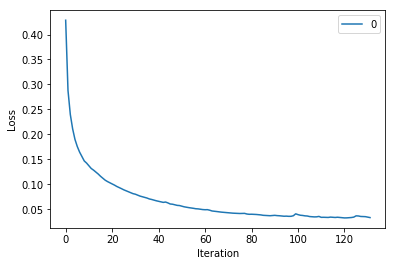

In [40]:
# plot loss curve
pd.DataFrame(estimator2.loss_curve_).plot()
plt.ylabel('Loss')
plt.xlabel('Iteration')
# plt.xlim([0, 200])

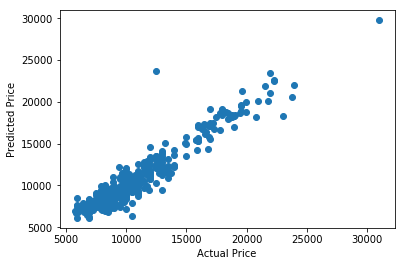

In [35]:
# predict on test data
pred_y2=estimator2.predict(test_X)

pred_y2_raw=scaler.inverse_transform(pred_y2.reshape(-1,1))
pred_y2_raw=pd.Series(pred_y2_raw.reshape(pred_y2.shape[0]))

# compare predicted price with actual price
plt.scatter(test_y_raw,pred_y2_raw)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [36]:
metrics.mean_absolute_error(test_y_raw,pred_y2_raw)

805.929621993027

In [37]:
metrics.mean_squared_error(test_y_raw,pred_y2_raw)

1340007.6760387088

In [38]:
metrics.r2_score(test_y_raw, pred_y2_raw)

0.9031880673052867

# 3. Compare model performance

In [50]:
hid = ['100','100']

alpha= ['0.001','0.5']

mae = [metrics.mean_absolute_error(test_y_raw, pred_y1_raw),
       metrics.mean_absolute_error(test_y_raw, pred_y2_raw)]

mse = [metrics.regression.mean_squared_error(test_y_raw, pred_y1_raw),
       metrics.regression.mean_squared_error(test_y_raw, pred_y2_raw)]

r2 = [metrics.r2_score(test_y_raw, pred_y1_raw),
      metrics.r2_score(test_y_raw, pred_y2_raw)]

# create a dataframe
pd.DataFrame({'Hidden Layers':hid,
              'Regularization constant':alpha,
              'MAE':mae,
              'MSE':mse,
              'R2':r2
              },
            index = ['Model 1','Model 2'])

,Hidden Layers,Regularization constant,MAE,MSE,R2
Model 1,100,0.001,947.200410,1.851977e+06,0.866200
Model 2,100,0.5,805.929622,1.340008e+06,0.903188


- From above comparison, we can see that model 2 has a better performance than model 1.
- Model 2 has smaller MAE and MSE, while has large R2.